In [1]:
from pycaret import regression
import pandas as pd
import numpy as np
import statistics
import math
# import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pycaret.classification import *
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
import pycaret

print(f'pycaret  version: {pycaret.__version__}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
%config InlineBackend.figure_format = 'retina'

pycaret  version: 2.3.6
pandas  version: 1.4.1
numpy   version: 1.19.5
seaborn version: 0.11.2


In [2]:
df = pd.read_csv("pellet.csv")

In [3]:
df

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash
0,177452,BTG-LR3,RUN,20211201 000000,00:00.0,799,4,44.999,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,751.9,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,388,282,5.0,158,1.7,135,44,50,34.0,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.7,37,21.2,0,402,400,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177453,BTG-LR3,RUN,20211201 000015,00:15.0,799,4,45.053,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,752.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,411,280,5.0,159,1.7,135,44,50,33.4,27.5,57.5,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.4,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,177454,BTG-LR3,RUN,20211201 000030,00:30.0,799,4,45.107,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,753.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,407,282,5.0,158,1.7,135,44,50,34.1,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,19.0,37,21.2,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,177455,BTG-LR3,RUN,20211201 000045,00:45.0,799,4,45.161,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,754.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,387,278,5.0,158,1.7,135,44,50,35.4,27.5,56.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,177456,BTG-LR3,RUN,20211201 000100,01:00.0,799,4,45.211,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,755.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,378,281,5.0,158,1.7,135,44,50,37.0,27.4,55.2,CONTROL BY TEMP,1,3,1.5,13.0,25,19.1,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [4]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


In [5]:
df.corr()

,n_id,c_production,n_line,n_total_feed,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,n_per_lq1,n_rpm_lq1,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash
n_id,1.000000,0.996784,NaN,-0.090537,-0.142094,-0.162394,0.418926,0.032337,0.012416,-0.097548,0.012416,0.063002,NaN,-0.208267,-0.185094,-0.264120,-0.259406,-0.269016,0.181658,-0.108317,-0.095909,-0.122169,-0.059740,0.050561,0.000189,-0.063815,0.012426,0.343834,0.365089,-0.041741,-0.030195,0.403826,0.162591,-0.165066,NaN,-0.169785,-0.066233,-0.074804,NaN,-0.068121,-0.072156,0.005051,0.031348,NaN,NaN,-0.144229,-0.142893,NaN,0.171132,0.160688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998574,0.997533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246239,0.113918,-0.097949,-0.112763,0.099029,0.523285,-0.137652,0.112763,-0.247318,-0.050111,-0.080686,0.307138,-0.202135,-0.229318,-0.004598,0.278819,-0.248877,-0.108553,-0.269758,-0.247957,0.237434,-0.318147,-0.039986,-0.228583,-0.013070,0.273269,-0.267233,-0.119293,-0.276017,-0.247957,-0.210232,0.071190,0.219441,-0.189777,-0.013037,-0.127432
c_production,0.996784,1.000000,NaN,-0.092236,-0.121195,-0.141891,0.422664,0.044327,0.026550,-0.081474,0.026550,0.071342,NaN,-0.216457,-0.195441,-0.256285,-0.251340,-0.261128,0.190876,-0.090901,-0.081877,-0.122070,-0.056331,0.032618,-0.011958,-0.048623,0.012189,0.357960,0.379031,-0.025457,-0.031373,0.407719,0.169946,-0.154375,NaN,-0.149690,-0.049686,-0.056711,NaN,-0.049464,-0.053156,0.000569,0.029004,NaN,NaN,-0.136517,-0.135833,NaN,0.164346,0.156571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998442,0.995218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248069,0.116162,-0.096029,-0.115258,0.098552,0.498799,-0.139993,0.115258,-0.240722,-0.040242,-0.080231,0.282075,-0.199678,-0.231557,-0.001859,0.277879,-0.239125,-0.113031,-0.263862,-0.257399,0.237789,-0.291667,-0.058757,-0.231673,-0.011647,0.272433,-0.258411,-0.124379,-0.270983,-0.257399,-0.212352,0.066363,0.224268,-0.196601,-0.015146,-0.134096
n_line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_total_feed,-0.090537,-0.092236,NaN,1.000000,-0.047321,-0.046477,0.017454,-0.046163,-0.046935,-0.019353,-0.046935,-0.075288,NaN,0.634455,0.143484,0.043740,0.055665,0.060269,-0.025751,-0.137615,0.018762,0.111444,0.044352,0.184948,0.214344,-0.027495,0.084466,-0.089968,-0.038976,0.001126,-0.020292,-0.078057,-0.059909,0.203471,NaN,-0.115457,-0.188246,-0.185552,NaN,-0.207288,-0.206739,0.201576,-0.001850,NaN,NaN,0.009436,0.018948,NaN,-0.032114,-0.019005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.094957,-0.097603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054414,0.039542,0.007734,-0

In [6]:
df.groupby(['c_formula']).size()

c_formula
401000000000.0     3280
403000000000.0     3015
3                     1
303                   1
303FI0000132       1702
303FI0000832          4
303GI0000129       2254
303GI0000832      25090
303I00000033          2
303I00000632       6778
303I00000832      10206
303I00000833      13116
304FI0000832       1689
305I00000832       1711
4.01E+11           9543
4.02E+11          21061
4.03E+11          11020
406B00000123          2
406B00000131        764
9.37E+11            435
905I00000023        780
905I00000123        590
905I00000124        658
905I00000125       2289
907I00000123       2264
932HV0000132        265
933A00000132        567
933G00000132        409
933V00000132        959
dtype: int64

In [7]:
df.fillna(value=0,inplace=True)

In [8]:
col  = 'c_formula'
conditions  = [(df[col] == '303I00000033') | (df[col] == '303I00000632') | (df[col] == '303I00000832') | (df[col] == '303I00000833')]
choices     = ['303I']
    
df['group'] = np.select(conditions, choices)
df

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
0,177452,BTG-LR3,RUN,20211201 000000,00:00.0,799,4,44.999,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,751.9,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,388,282,5.0,158,1.7,135,44,50,34.0,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.7,37,21.2,0,402,400,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0
1,177453,BTG-LR3,RUN,20211201 000015,00:15.0,799,4,45.053,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,752.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,411,280,5.0,159,1.7,135,44,50,33.4,27.5,57.5,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.4,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0
2,177454,BTG-LR3,RUN,20211201 000030,00:30.0,799,4,45.107,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,753.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,407,282,5.0,158,1.7,135,44,50,34.1,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,19.0,37,21.2,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0
3,177455,BTG-LR3,RUN,20211201 000045,00:45.0,799,4,45.161,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,754.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,387,278,5.0,158,1.7,135,44,50,35.4,27.5,56.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0
4,177456,BTG-LR3,RUN,20211201 000100,01:00.0,799,4,45.211,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,755.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,378,281,5.0,158,1.7,135,44,50,37.0,27.4,55.2,CONTROL BY TEMP,1,3,1.5,13.0,25,19.1,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0,0.0

In [9]:
fn303I = df.loc[(df.group == '303I')]
fn303I

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
8522,194276,BTG-LR3,RUN,20211203 235945,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8523,194275,BTG-LR3,RUN,20211203 235930,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8524,194274,BTG-LR3,RUN,20211203 235915,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8525,194273,BTG-LR3,RUN,20211203 235900,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8526,194272,BTG-LR3,RUN,20211203 235845,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0

In [10]:
fn303I.columns

Index(['n_id', 'c_plant_id', 'c_status', 'c_time', 'd_time', 'c_production',
       'n_line', 'n_total_feed', 'c_formula', 'n_feed_flowrate',
       ...
       'GFPQF7', 'GFPQF8', 'GFPQF10', 'GFPQF25', 'Moisture', 'Protein', 'FAT',
       'Fiber', 'Ash', 'group'],
      dtype='object', length=119)

In [11]:
fn303I

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
8522,194276,BTG-LR3,RUN,20211203 235945,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8523,194275,BTG-LR3,RUN,20211203 235930,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8524,194274,BTG-LR3,RUN,20211203 235915,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8525,194273,BTG-LR3,RUN,20211203 235900,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8526,194272,BTG-LR3,RUN,20211203 235845,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0

In [12]:
fn303I = fn303I[fn303I['c_status'].isin(['RUN'])]
fn303I

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
8522,194276,BTG-LR3,RUN,20211203 235945,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8523,194275,BTG-LR3,RUN,20211203 235930,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8524,194274,BTG-LR3,RUN,20211203 235915,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8525,194273,BTG-LR3,RUN,20211203 235900,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8526,194272,BTG-LR3,RUN,20211203 235845,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0

In [13]:
fn303I['c_time'] = pd.to_datetime(fn303I['c_time'])
fn303I

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
8522,194276,BTG-LR3,RUN,2021-12-03 23:59:45,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8523,194275,BTG-LR3,RUN,2021-12-03 23:59:30,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8524,194274,BTG-LR3,RUN,2021-12-03 23:59:15,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8525,194273,BTG-LR3,RUN,2021-12-03 23:59:00,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.00,2.69,0.00,303I
8526,194272,BTG-LR3,RUN,2021-12-03 23:58:45,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0

<AxesSubplot:xlabel='c_time'>

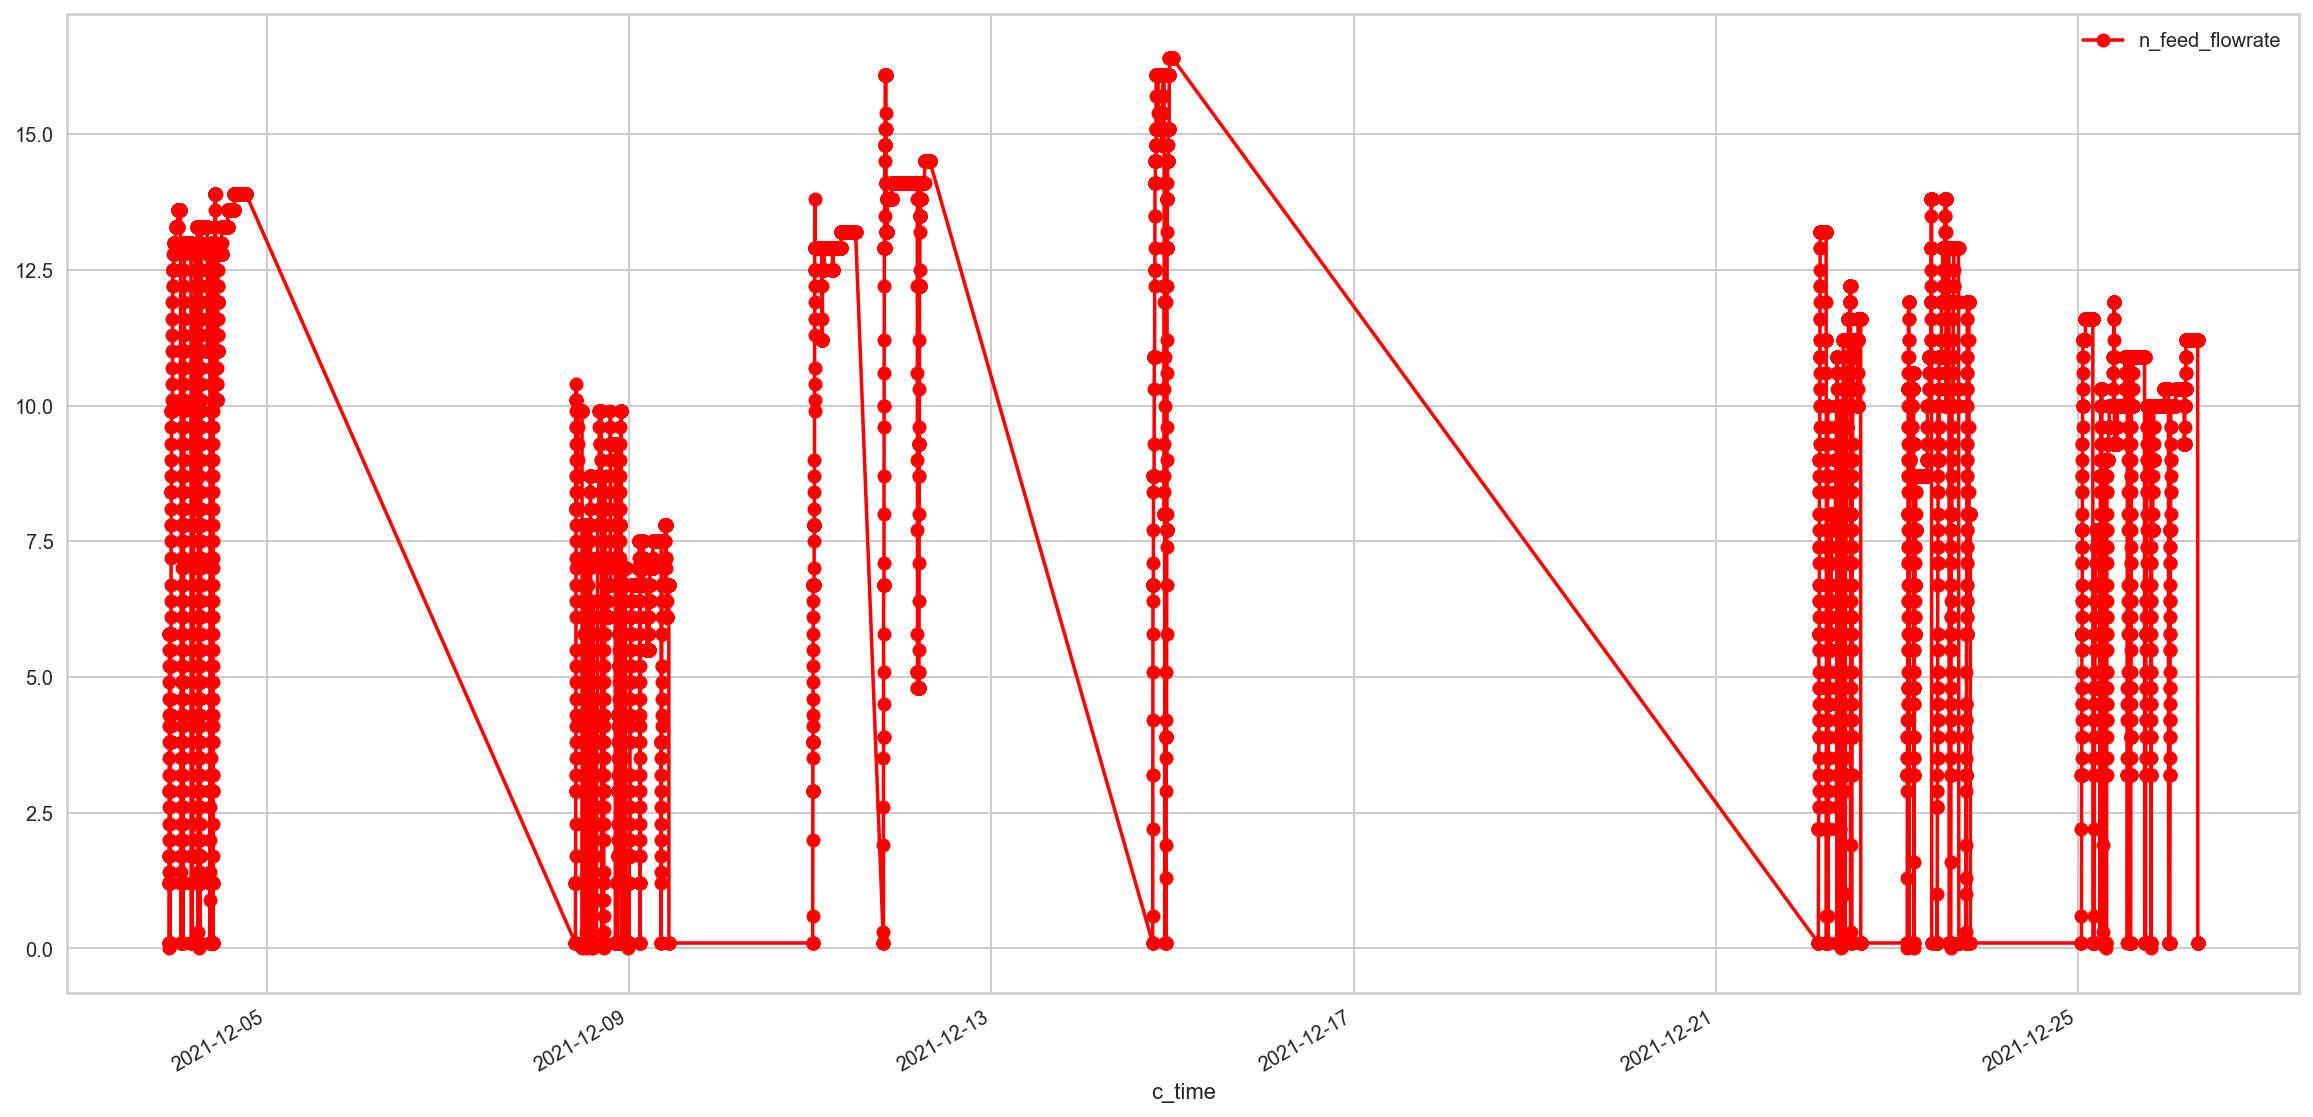

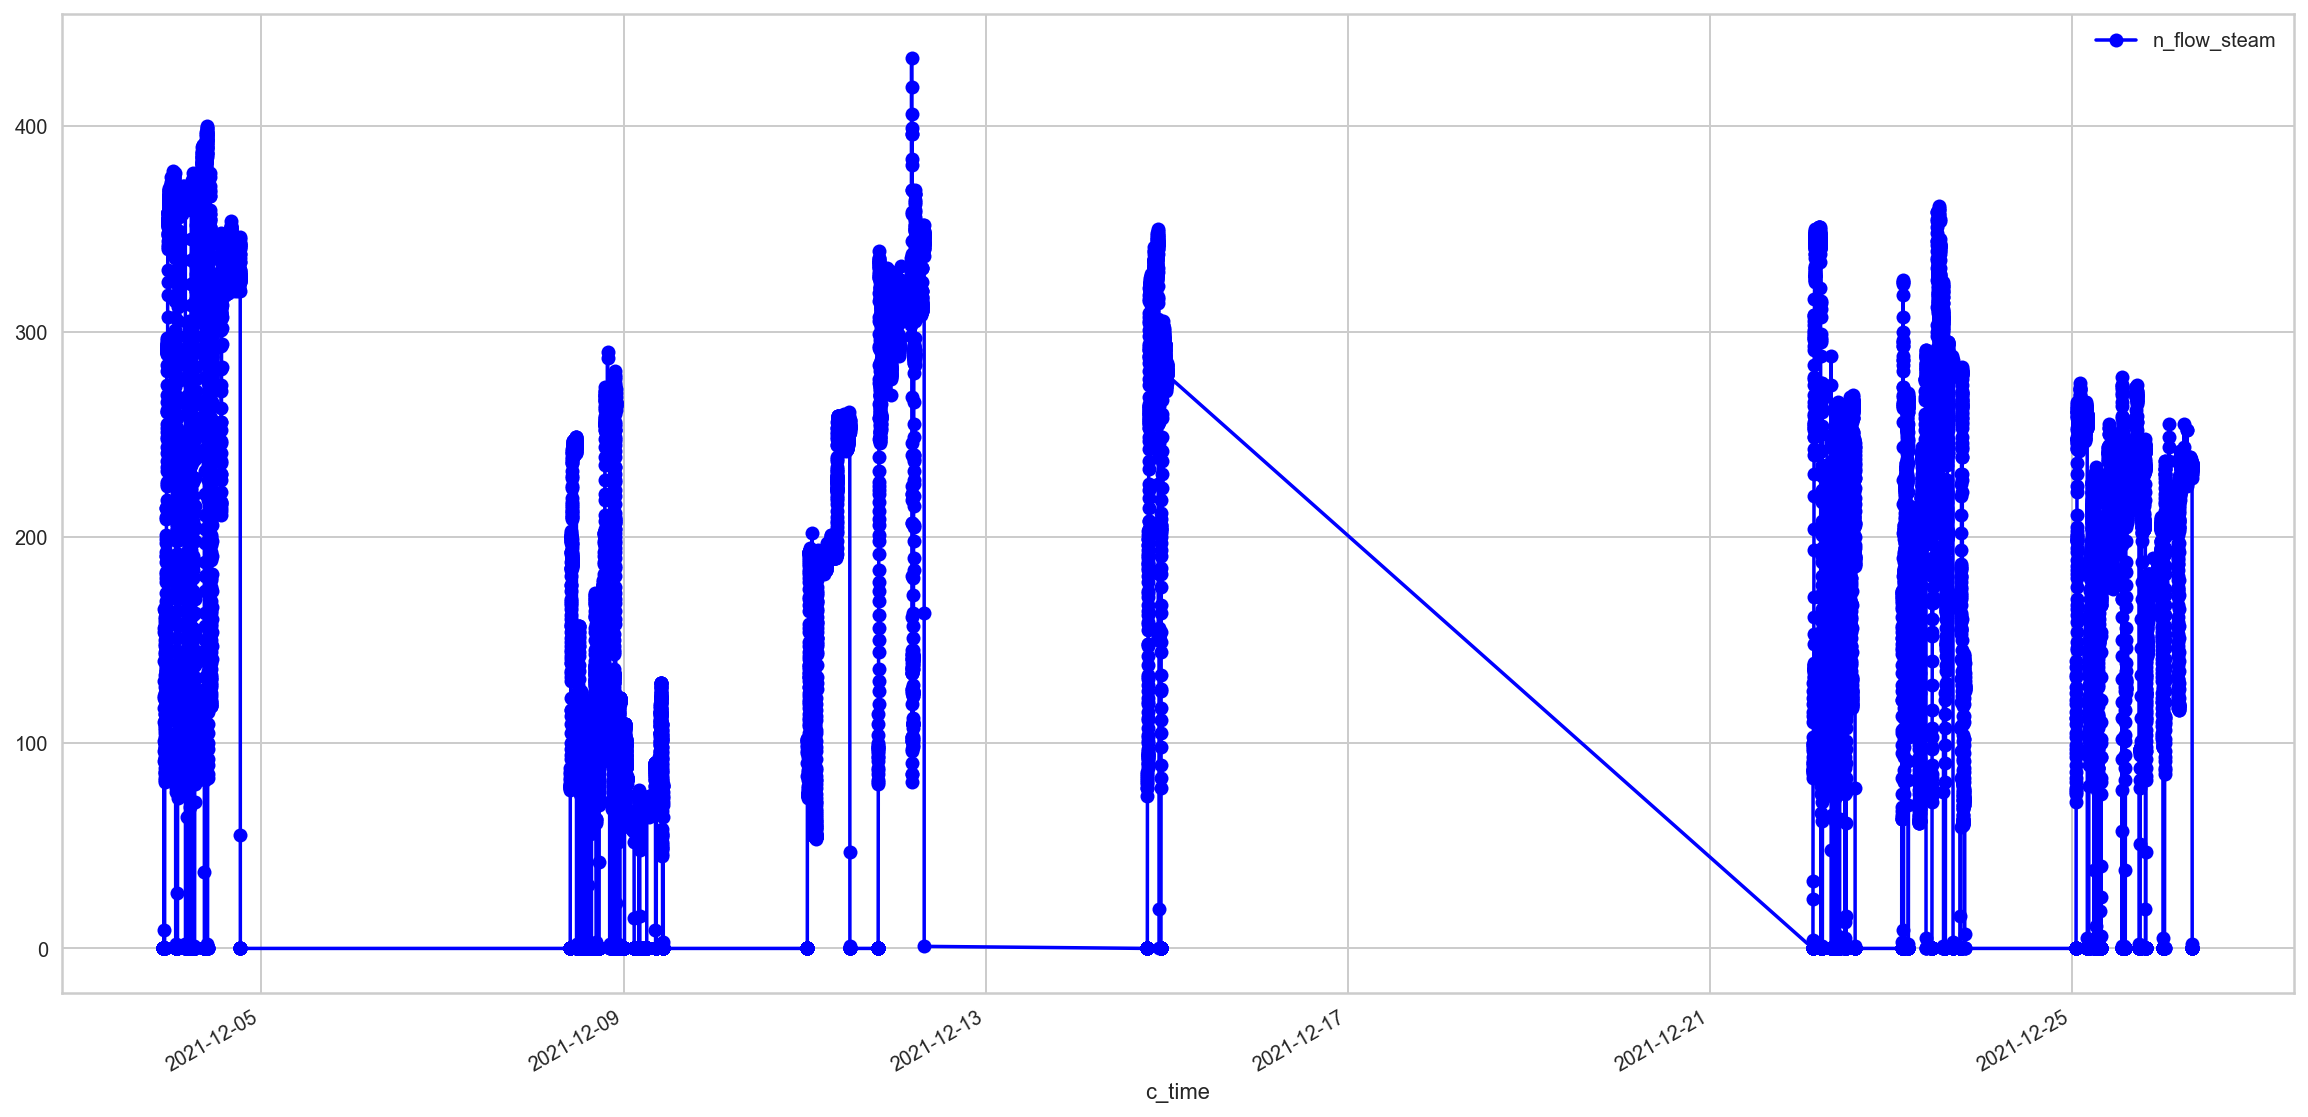

In [18]:
fn303I.plot(y='n_feed_flowrate',x='c_time',marker='o', color='red',figsize=(20, 10))
fn303I.plot(y='n_flow_steam',x='c_time',marker='o', color='blue',figsize=(20, 10))

In [ ]:
# dims = (14.7, 8.27)
# fig, ax = plt.subplots(figsize= dims)
# sns.scatterplot(data = fn303I, x = "c_time", y = "n_feed_flowrate", hue="c_formula", palette="Set2", s=100)
# plt.show()

In [15]:
fn303I.to_csv('df_pellet_lr3.csv')

In [16]:
fn303I.reset_index(inplace = True)

In [17]:
fn303I.head()

,index,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
0,8522,194276,BTG-LR3,RUN,2021-12-03 23:59:45,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.0,2.69,0.0,303I
1,8523,194275,BTG-LR3,RUN,2021-12-03 23:59:30,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.0,2.69,0.0,303I
2,8524,194274,BTG-LR3,RUN,2021-12-03 23:59:15,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.0,2.69,0.0,303I
3,8525,194273,BTG-LR3,RUN,2021-12-03 23:59:00,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,0.0,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,0.0,108.0,1387.1,0.0,0.0,-0.2457,-0.039024,0.4393,0.7747,1.5139,0.0,0.1366,2.0048,0.0,0.0,11.41,16.21,4.0,2.69,0.0,303I
4,8526,194272,BTG-LR3,RUN,2021-12-03 23:58:45,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.0,0.0,10,96.6

In [19]:
list(fn303I.columns)

['index',
 'n_id',
 'c_plant_id',
 'c_status',
 'c_time',
 'd_time',
 'c_production',
 'n_line',
 'n_total_feed',
 'c_formula',
 'n_feed_flowrate',
 'n_per_feed',
 'n_density',
 'n_sp_temp1',
 'n_pv_temp1',
 'n_temp1',
 'n_temp2',
 'n_temp3',
 'n_temp4',
 'n_total_lq1',
 'c_fat_status',
 'n_per_lq1',
 'n_rpm_lq1',
 'c_lq1_code',
 'c_lq1_name',
 'c_3way_status',
 'n_sp_lq1',
 'n_pv_lq1',
 'n_sp_amp_pl',
 'n_pv_amp_pl',
 'n_flow_steam',
 'n_steam_pressure1',
 'n_steam_temp1',
 'n_steam_pressure2',
 'n_steam_temp2',
 'n_per_valve1',
 'n_max_valve1',
 'n_product_temp',
 'n_ambient_temp',
 'n_airout_temp',
 'c_steam_mode',
 'c_way_cooler',
 'n_min_feee_start',
 'n_early_target',
 'n_target_feed',
 'n_max_capacity',
 'n_amp_cond1',
 'n_speed_cond1',
 'n_amp_cond2',
 'n_speed_cond2',
 'n_rsm_left',
 'n_rsm_right',
 'n_gap',
 'n_sp_gap',
 'n_kwhr_pl',
 'n_kwhr_conveyor',
 'n_per_fine_return',
 'n_flow_fine_return',
 'n_max_fine_return',
 'n_pdi',
 'n_per_fine_fg',
 'c_data_nir1',
 'c_data_nir2

In [20]:
fn303I.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29474 entries, 0 to 29473
Data columns (total 120 columns):
 #    Column              Dtype         
---   ------              -----         
 0    index               int64         
 1    n_id                int64         
 2    c_plant_id          object        
 3    c_status            object        
 4    c_time              datetime64[ns]
 5    d_time              object        
 6    c_production        int64         
 7    n_line              int64         
 8    n_total_feed        float64       
 9    c_formula           object        
 10   n_feed_flowrate     float64       
 11   n_per_feed          int64         
 12   n_density           float64       
 13   n_sp_temp1          int64         
 14   n_pv_temp1          int64         
 15   n_temp1             int64         
 16   n_temp2             int64         
 17   n_temp3             int64         
 18   n_temp4             int64         
 19   n_total_lq1         flo

In [32]:
df30 = pd.read_csv("df_pellet_lr3.csv")
df30

,Unnamed: 0,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,...,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
0,8522,194276,BTG-LR3,RUN,12/3/2021 23:59,59:45.0,816,4,19.157,303I00000832,...,0.1366,2.0048,0,0,11.41,16.21,4.00,2.69,0.00,303I
1,8523,194275,BTG-LR3,RUN,12/3/2021 23:59,59:30.0,816,4,19.094,303I00000832,...,0.1366,2.0048,0,0,11.41,16.21,4.00,2.69,0.00,303I
2,8524,194274,BTG-LR3,RUN,12/3/2021 23:59,59:15.0,816,4,19.039,303I00000832,...,0.1366,2.0048,0,0,11.41,16.21,4.00,2.69,0.00,303I
3,8525,194273,BTG-LR3,RUN,12/3/2021 23:59,59:00.0,816,4,18.983,303I00000832,...,0.1366,2.0048,0,0,11.41,16.21,4.00,2.69,0.00,303I
4,8526,194272,BTG-LR3,RUN,12/3/2021 23:58,58:45.0,816,4,18.928,303I00000832,...,0.1366,2.0048,0,0,11.41,16.21,4.00,2.69,0.00,303I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29450,135301,318104,BTG-LR3,RUN,12/26/2021 0:22,22:00.0,932,4,0.062,303I00000833,...,0.1366,1.5624,0,0,11.50,16.21,4.26,2.62,6.61,303I
29451,135302,318103,BTG-LR3,RUN,12/26/2021 0:21,21:45.0,932,4,0.048,303I00000833,...,0.1366,1.5624,0,0,11.50,16.21,4.26,2.62,6.61,303I
29452,135303,318102,BTG-LR3,RUN,12/26/2021 0:21,21:30.0,932,4,0.034,303I00000833,...,0.1366,1.5624,0,0,11.50,16.21,4.26,2.62,6.61,303I
29453,135304,318101,BTG-LR3,RUN,12/26/2021 0:21,21:15.0,932,4,0.022,303I00000833,...,0.1366,1.5624,0,0,11.50,16.21,4.26,2.62,6.61,303I


In [33]:
from pycaret.regression import *

In [35]:
reg1 = setup(data = fn303I, target = 'n_feed_flowrate',
             numeric_features = ['n_total_feed',
 'n_per_feed',
 'n_sp_temp1',
 'n_pv_temp1',
 'n_temp1',
 'n_temp2',
 'n_temp3',
 'n_temp4',
 'n_total_lq1',
 'n_per_lq1',
 'n_rpm_lq1',
 'n_sp_lq1',
 'n_pv_lq1',
 'n_sp_amp_pl',
 'n_pv_amp_pl',
 'n_sp_amp_pl',
 'n_steam_pressure1',
 'n_steam_temp1',
 'n_steam_pressure2',
 'n_steam_temp2',
 'n_per_valve1',
 'n_max_valve1',
 'n_product_temp',
 'n_ambient_temp',
 'c_way_cooler',
 'n_min_feee_start',
 'n_early_target',
 'n_max_capacity',
 'n_amp_cond1',
 'n_speed_cond1',
 'n_amp_cond2',
 'n_rsm_left',
 'n_rsm_right',
 'n_pdi',
 'n_per_fine_fg',
 'c_die_serial',
 'n_die_hr',
 'n_die_meter',
 'FPQF'],
             normalize = True, normalize_method = 'zscore',
             ignore_features = ['n_flow_steam'],
             
             train_size=0.7,
             use_gpu=True,
             categorical_imputation='mode',
             remove_outliers = True)


#             categorical_features = ['',''],

,Description,Value
0,session_id,373
1,Target,n_feed_flowrate
2,Original Data,"(29455, 120)"
3,Missing Values,0
4,Numeric Features,51
5,Categorical Features,65
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(19587, 342)"


In [ ]:
compare_models()